# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [2]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [3]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [4]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.6802720496109664e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularization loss.

In [7]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [10]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.669858e-09
b1 max relative error: 2.738423e-09
W2 max relative error: 3.440708e-09
b2 max relative error: 3.865039e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.02.

Final training loss:  0.01714960793873202


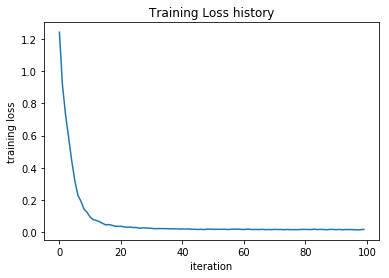

In [23]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [24]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    
    # Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
    try:
       del X_train, y_train
       del X_test, y_test
       print('Clear previously loaded data.')
    except:
       pass

    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [25]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=200,
            learning_rate=1e-4, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)


iteration 0 / 1000: loss 2.302954
iteration 100 / 1000: loss 2.302550
iteration 200 / 1000: loss 2.297648
iteration 300 / 1000: loss 2.259602
iteration 400 / 1000: loss 2.204170
iteration 500 / 1000: loss 2.118565
iteration 600 / 1000: loss 2.051535
iteration 700 / 1000: loss 1.988466
iteration 800 / 1000: loss 2.006591
iteration 900 / 1000: loss 1.951473
Validation accuracy:  0.287


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

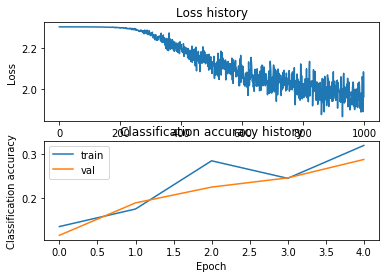

In [26]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()
plt.show()

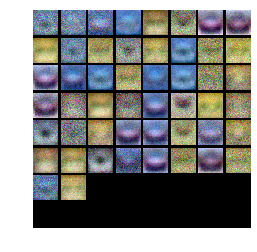

In [27]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can (52% could serve as a reference), with a fully-connected Neural Network. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

**Explain your hyperparameter tuning process below.**

$\color{blue}{\textit Your Answer:}$

In [34]:
best_net = None # store the best model into this 

#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****

learning_rates = [1e-3,5e-3,1e-2,1e-1,5e-1]
hidden_size = [20,50,100,150,200]
num_iters = [100,500,1000,2000,5000]
reg = [0.1,0.25,0.8,1.5,3,5,10]

results = {}
best_val = -1
for lr in learning_rates:
    for hs in hidden_size:
        for it in num_iters:
            for regu in reg:
                net = TwoLayerNet(input_size,hs,num_classes)
                
                # Train the network
                stats = net.train(X_train, y_train, X_val, y_val,
                                num_iters=it, batch_size=200,
                                learning_rate=lr, learning_rate_decay=0.95,
                                reg=regu, verbose=True)
                
                #Prediction on training set
                train_accuracy = (net.predict(X_train) == y_train).mean()
                
                #Predict on validation set
                val_accuracy = (net.predict(X_val) == y_val).mean()
                
                results[(lr,hs,it,regu)] = (train_accuracy,val_accuracy)
                
                if(val_accuracy > best_val):
                    best_net = net
                    best_val = val_accuracy

for lr,hs,it,regu in sorted(results):
    train_acc,val_acc = results[(lr,hs,it,regu)]
    print('lr %e hs %e it %e regu %e train accuracy: %f val accuracy: %f' % (
                lr, hs, it, regu, train_accuracy, val_accuracy))

print('best validation accuracy achieved during cross validation is: %f' %best_val)

# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****


iteration 0 / 100: loss 2.302645
iteration 0 / 100: loss 2.302742
iteration 0 / 100: loss 2.303074
iteration 0 / 100: loss 2.303484
iteration 0 / 100: loss 2.304444
iteration 0 / 100: loss 2.305689
iteration 0 / 100: loss 2.308720
iteration 0 / 500: loss 2.302665
iteration 100 / 500: loss 1.912213
iteration 200 / 500: loss 1.980804
iteration 300 / 500: loss 1.678228
iteration 400 / 500: loss 1.671289
iteration 0 / 500: loss 2.302755
iteration 100 / 500: loss 2.064099
iteration 200 / 500: loss 1.868519
iteration 300 / 500: loss 1.742741
iteration 400 / 500: loss 1.652880
iteration 0 / 500: loss 2.303089
iteration 100 / 500: loss 1.999631
iteration 200 / 500: loss 1.813924
iteration 300 / 500: loss 1.690386
iteration 400 / 500: loss 1.686880
iteration 0 / 500: loss 2.303504
iteration 100 / 500: loss 2.020644
iteration 200 / 500: loss 1.930978
iteration 300 / 500: loss 1.792940
iteration 400 / 500: loss 1.838931
iteration 0 / 500: loss 2.304422
iteration 100 / 500: loss 1.994206
iteration

iteration 1700 / 2000: loss 1.986810
iteration 1800 / 2000: loss 1.952369
iteration 1900 / 2000: loss 2.024741
iteration 0 / 2000: loss 2.308716
iteration 100 / 2000: loss 2.131526
iteration 200 / 2000: loss 2.106467
iteration 300 / 2000: loss 2.155113
iteration 400 / 2000: loss 2.169252
iteration 500 / 2000: loss 2.066598
iteration 600 / 2000: loss 2.032382
iteration 700 / 2000: loss 2.169041
iteration 800 / 2000: loss 2.123828
iteration 900 / 2000: loss 2.098288
iteration 1000 / 2000: loss 2.152664
iteration 1100 / 2000: loss 2.044867
iteration 1200 / 2000: loss 2.103296
iteration 1300 / 2000: loss 2.018504
iteration 1400 / 2000: loss 2.115406
iteration 1500 / 2000: loss 2.070194
iteration 1600 / 2000: loss 2.105457
iteration 1700 / 2000: loss 2.042633
iteration 1800 / 2000: loss 2.061137
iteration 1900 / 2000: loss 2.178767
iteration 0 / 5000: loss 2.302643
iteration 100 / 5000: loss 1.976867
iteration 200 / 5000: loss 1.806390
iteration 300 / 5000: loss 1.678934
iteration 400 / 500

iteration 100 / 5000: loss 2.002591
iteration 200 / 5000: loss 1.871959
iteration 300 / 5000: loss 1.853844
iteration 400 / 5000: loss 1.867504
iteration 500 / 5000: loss 1.843560
iteration 600 / 5000: loss 1.851694
iteration 700 / 5000: loss 1.798210
iteration 800 / 5000: loss 1.956913
iteration 900 / 5000: loss 1.744253
iteration 1000 / 5000: loss 1.911480
iteration 1100 / 5000: loss 1.882796
iteration 1200 / 5000: loss 1.871771
iteration 1300 / 5000: loss 1.767909
iteration 1400 / 5000: loss 1.936354
iteration 1500 / 5000: loss 1.850552
iteration 1600 / 5000: loss 1.803637
iteration 1700 / 5000: loss 1.788908
iteration 1800 / 5000: loss 1.760935
iteration 1900 / 5000: loss 1.884665
iteration 2000 / 5000: loss 1.794793
iteration 2100 / 5000: loss 1.947591
iteration 2200 / 5000: loss 1.789999
iteration 2300 / 5000: loss 1.861888
iteration 2400 / 5000: loss 1.818550
iteration 2500 / 5000: loss 1.837119
iteration 2600 / 5000: loss 1.873264
iteration 2700 / 5000: loss 1.885057
iteration 

iteration 600 / 1000: loss 1.762704
iteration 700 / 1000: loss 1.678960
iteration 800 / 1000: loss 1.825951
iteration 900 / 1000: loss 1.882754
iteration 0 / 1000: loss 2.307188
iteration 100 / 1000: loss 2.104487
iteration 200 / 1000: loss 1.926434
iteration 300 / 1000: loss 1.881143
iteration 400 / 1000: loss 1.826935
iteration 500 / 1000: loss 1.907733
iteration 600 / 1000: loss 1.848819
iteration 700 / 1000: loss 1.848122
iteration 800 / 1000: loss 1.975735
iteration 900 / 1000: loss 1.791528
iteration 0 / 1000: loss 2.310326
iteration 100 / 1000: loss 2.085812
iteration 200 / 1000: loss 1.948838
iteration 300 / 1000: loss 1.928057
iteration 400 / 1000: loss 1.952497
iteration 500 / 1000: loss 1.904493
iteration 600 / 1000: loss 2.015369
iteration 700 / 1000: loss 1.947110
iteration 800 / 1000: loss 2.014073
iteration 900 / 1000: loss 1.913405
iteration 0 / 1000: loss 2.318005
iteration 100 / 1000: loss 2.076999
iteration 200 / 1000: loss 2.065632
iteration 300 / 1000: loss 2.11091

iteration 200 / 5000: loss 1.804422
iteration 300 / 5000: loss 1.688367
iteration 400 / 5000: loss 1.582876
iteration 500 / 5000: loss 1.697896
iteration 600 / 5000: loss 1.677499
iteration 700 / 5000: loss 1.540920
iteration 800 / 5000: loss 1.518684
iteration 900 / 5000: loss 1.450865
iteration 1000 / 5000: loss 1.517536
iteration 1100 / 5000: loss 1.469756
iteration 1200 / 5000: loss 1.284013
iteration 1300 / 5000: loss 1.438974
iteration 1400 / 5000: loss 1.434283
iteration 1500 / 5000: loss 1.504895
iteration 1600 / 5000: loss 1.390684
iteration 1700 / 5000: loss 1.328223
iteration 1800 / 5000: loss 1.495481
iteration 1900 / 5000: loss 1.420997
iteration 2000 / 5000: loss 1.435488
iteration 2100 / 5000: loss 1.374625
iteration 2200 / 5000: loss 1.483973
iteration 2300 / 5000: loss 1.436432
iteration 2400 / 5000: loss 1.421094
iteration 2500 / 5000: loss 1.415781
iteration 2600 / 5000: loss 1.444980
iteration 2700 / 5000: loss 1.379483
iteration 2800 / 5000: loss 1.484796
iteration

iteration 2500 / 5000: loss 1.910811
iteration 2600 / 5000: loss 2.026428
iteration 2700 / 5000: loss 1.891170
iteration 2800 / 5000: loss 2.017601
iteration 2900 / 5000: loss 1.956652
iteration 3000 / 5000: loss 1.913478
iteration 3100 / 5000: loss 1.905931
iteration 3200 / 5000: loss 1.950805
iteration 3300 / 5000: loss 1.954891
iteration 3400 / 5000: loss 1.968947
iteration 3500 / 5000: loss 1.994632
iteration 3600 / 5000: loss 2.006923
iteration 3700 / 5000: loss 1.899769
iteration 3800 / 5000: loss 1.860945
iteration 3900 / 5000: loss 1.890653
iteration 4000 / 5000: loss 1.937185
iteration 4100 / 5000: loss 1.951529
iteration 4200 / 5000: loss 1.982114
iteration 4300 / 5000: loss 1.913960
iteration 4400 / 5000: loss 1.946656
iteration 4500 / 5000: loss 1.959084
iteration 4600 / 5000: loss 1.888050
iteration 4700 / 5000: loss 1.970971
iteration 4800 / 5000: loss 1.886218
iteration 4900 / 5000: loss 1.874577
iteration 0 / 5000: loss 2.318079
iteration 100 / 5000: loss 2.177366
itera

iteration 100 / 2000: loss 1.964707
iteration 200 / 2000: loss 1.823930
iteration 300 / 2000: loss 1.743683
iteration 400 / 2000: loss 1.656398
iteration 500 / 2000: loss 1.675756
iteration 600 / 2000: loss 1.658705
iteration 700 / 2000: loss 1.729125
iteration 800 / 2000: loss 1.637975
iteration 900 / 2000: loss 1.557939
iteration 1000 / 2000: loss 1.490885
iteration 1100 / 2000: loss 1.543244
iteration 1200 / 2000: loss 1.588948
iteration 1300 / 2000: loss 1.675391
iteration 1400 / 2000: loss 1.692185
iteration 1500 / 2000: loss 1.538969
iteration 1600 / 2000: loss 1.519000
iteration 1700 / 2000: loss 1.571430
iteration 1800 / 2000: loss 1.602241
iteration 1900 / 2000: loss 1.457393
iteration 0 / 2000: loss 2.307223
iteration 100 / 2000: loss 1.966717
iteration 200 / 2000: loss 1.910924
iteration 300 / 2000: loss 1.766197
iteration 400 / 2000: loss 1.787217
iteration 500 / 2000: loss 1.755319
iteration 600 / 2000: loss 1.748114
iteration 700 / 2000: loss 1.835384
iteration 800 / 2000

iteration 2500 / 5000: loss 1.602315
iteration 2600 / 5000: loss 1.535680
iteration 2700 / 5000: loss 1.533916
iteration 2800 / 5000: loss 1.583486
iteration 2900 / 5000: loss 1.576076
iteration 3000 / 5000: loss 1.626366
iteration 3100 / 5000: loss 1.566107
iteration 3200 / 5000: loss 1.526765
iteration 3300 / 5000: loss 1.639416
iteration 3400 / 5000: loss 1.685532
iteration 3500 / 5000: loss 1.575972
iteration 3600 / 5000: loss 1.511320
iteration 3700 / 5000: loss 1.513375
iteration 3800 / 5000: loss 1.567849
iteration 3900 / 5000: loss 1.596281
iteration 4000 / 5000: loss 1.533179
iteration 4100 / 5000: loss 1.666587
iteration 4200 / 5000: loss 1.482367
iteration 4300 / 5000: loss 1.540169
iteration 4400 / 5000: loss 1.545608
iteration 4500 / 5000: loss 1.625868
iteration 4600 / 5000: loss 1.555555
iteration 4700 / 5000: loss 1.512812
iteration 4800 / 5000: loss 1.473392
iteration 4900 / 5000: loss 1.437581
iteration 0 / 5000: loss 2.307192
iteration 100 / 5000: loss 1.982900
itera

iteration 4800 / 5000: loss 2.100409
iteration 4900 / 5000: loss 2.117680
iteration 0 / 100: loss 2.303068
iteration 0 / 100: loss 2.303785
iteration 0 / 100: loss 2.306284
iteration 0 / 100: loss 2.309557
iteration 0 / 100: loss 2.316443
iteration 0 / 100: loss 2.325694
iteration 0 / 100: loss 2.348783
iteration 0 / 500: loss 2.303097
iteration 100 / 500: loss 1.961435
iteration 200 / 500: loss 1.679496
iteration 300 / 500: loss 1.662299
iteration 400 / 500: loss 1.514135
iteration 0 / 500: loss 2.303684
iteration 100 / 500: loss 1.890661
iteration 200 / 500: loss 1.666476
iteration 300 / 500: loss 1.623792
iteration 400 / 500: loss 1.576061
iteration 0 / 500: loss 2.306281
iteration 100 / 500: loss 1.893847
iteration 200 / 500: loss 1.918774
iteration 300 / 500: loss 1.781829
iteration 400 / 500: loss 1.747586
iteration 0 / 500: loss 2.309488
iteration 100 / 500: loss 1.972815
iteration 200 / 500: loss 1.874980
iteration 300 / 500: loss 1.826479
iteration 400 / 500: loss 1.803648
ite

iteration 1500 / 2000: loss 1.997876
iteration 1600 / 2000: loss 1.990382
iteration 1700 / 2000: loss 1.957830
iteration 1800 / 2000: loss 1.915916
iteration 1900 / 2000: loss 2.046579
iteration 0 / 2000: loss 2.348805
iteration 100 / 2000: loss 2.146399
iteration 200 / 2000: loss 2.011610
iteration 300 / 2000: loss 2.150770
iteration 400 / 2000: loss 2.000056
iteration 500 / 2000: loss 2.066550
iteration 600 / 2000: loss 2.096735
iteration 700 / 2000: loss 2.089051
iteration 800 / 2000: loss 2.079813
iteration 900 / 2000: loss 2.109427
iteration 1000 / 2000: loss 2.026975
iteration 1100 / 2000: loss 2.134682
iteration 1200 / 2000: loss 2.132770
iteration 1300 / 2000: loss 2.123491
iteration 1400 / 2000: loss 2.164471
iteration 1500 / 2000: loss 2.091812
iteration 1600 / 2000: loss 2.103534
iteration 1700 / 2000: loss 2.173090
iteration 1800 / 2000: loss 2.059154
iteration 1900 / 2000: loss 2.046629
iteration 0 / 5000: loss 2.303075
iteration 100 / 5000: loss 1.884024
iteration 200 / 5

iteration 4900 / 5000: loss 1.786777
iteration 0 / 5000: loss 2.316520
iteration 100 / 5000: loss 2.042789
iteration 200 / 5000: loss 1.936661
iteration 300 / 5000: loss 1.902749
iteration 400 / 5000: loss 1.841353
iteration 500 / 5000: loss 1.937193
iteration 600 / 5000: loss 1.859713
iteration 700 / 5000: loss 1.819506
iteration 800 / 5000: loss 1.891999
iteration 900 / 5000: loss 1.864960
iteration 1000 / 5000: loss 1.848566
iteration 1100 / 5000: loss 1.834182
iteration 1200 / 5000: loss 1.908677
iteration 1300 / 5000: loss 1.751981
iteration 1400 / 5000: loss 1.861591
iteration 1500 / 5000: loss 1.919014
iteration 1600 / 5000: loss 1.814791
iteration 1700 / 5000: loss 1.777581
iteration 1800 / 5000: loss 1.882268
iteration 1900 / 5000: loss 1.923620
iteration 2000 / 5000: loss 1.746499
iteration 2100 / 5000: loss 1.897060
iteration 2200 / 5000: loss 1.837360
iteration 2300 / 5000: loss 1.790270
iteration 2400 / 5000: loss 1.766496
iteration 2500 / 5000: loss 1.826412
iteration 260

iteration 400 / 1000: loss 1.888904
iteration 500 / 1000: loss 1.768052
iteration 600 / 1000: loss 1.789391
iteration 700 / 1000: loss 1.817297
iteration 800 / 1000: loss 1.678923
iteration 900 / 1000: loss 1.779180
iteration 0 / 1000: loss 2.321081
iteration 100 / 1000: loss 1.967556
iteration 200 / 1000: loss 1.984329
iteration 300 / 1000: loss 1.963193
iteration 400 / 1000: loss 1.896706
iteration 500 / 1000: loss 1.802100
iteration 600 / 1000: loss 1.905435
iteration 700 / 1000: loss 1.876368
iteration 800 / 1000: loss 1.880228
iteration 900 / 1000: loss 1.892026
iteration 0 / 1000: loss 2.333445
iteration 100 / 1000: loss 2.026740
iteration 200 / 1000: loss 1.964903
iteration 300 / 1000: loss 1.983965
iteration 400 / 1000: loss 1.939116
iteration 500 / 1000: loss 1.984568
iteration 600 / 1000: loss 1.975201
iteration 700 / 1000: loss 1.924468
iteration 800 / 1000: loss 1.877417
iteration 900 / 1000: loss 1.937030
iteration 0 / 1000: loss 2.364139
iteration 100 / 1000: loss 2.23415

iteration 0 / 5000: loss 2.304163
iteration 100 / 5000: loss 1.935695
iteration 200 / 5000: loss 1.682745
iteration 300 / 5000: loss 1.749046
iteration 400 / 5000: loss 1.746045
iteration 500 / 5000: loss 1.595264
iteration 600 / 5000: loss 1.681063
iteration 700 / 5000: loss 1.514653
iteration 800 / 5000: loss 1.478967
iteration 900 / 5000: loss 1.565315
iteration 1000 / 5000: loss 1.391657
iteration 1100 / 5000: loss 1.419957
iteration 1200 / 5000: loss 1.430471
iteration 1300 / 5000: loss 1.462505
iteration 1400 / 5000: loss 1.435059
iteration 1500 / 5000: loss 1.343215
iteration 1600 / 5000: loss 1.392702
iteration 1700 / 5000: loss 1.357539
iteration 1800 / 5000: loss 1.517692
iteration 1900 / 5000: loss 1.287664
iteration 2000 / 5000: loss 1.445917
iteration 2100 / 5000: loss 1.389130
iteration 2200 / 5000: loss 1.297471
iteration 2300 / 5000: loss 1.258898
iteration 2400 / 5000: loss 1.319675
iteration 2500 / 5000: loss 1.188158
iteration 2600 / 5000: loss 1.403577
iteration 270

iteration 2400 / 5000: loss 1.968983
iteration 2500 / 5000: loss 1.979354
iteration 2600 / 5000: loss 1.941057
iteration 2700 / 5000: loss 1.902234
iteration 2800 / 5000: loss 1.975912
iteration 2900 / 5000: loss 1.865705
iteration 3000 / 5000: loss 1.910782
iteration 3100 / 5000: loss 1.998032
iteration 3200 / 5000: loss 1.887699
iteration 3300 / 5000: loss 1.988415
iteration 3400 / 5000: loss 1.954245
iteration 3500 / 5000: loss 1.900633
iteration 3600 / 5000: loss 1.931610
iteration 3700 / 5000: loss 1.939898
iteration 3800 / 5000: loss 2.008192
iteration 3900 / 5000: loss 2.016776
iteration 4000 / 5000: loss 2.074251
iteration 4100 / 5000: loss 1.914248
iteration 4200 / 5000: loss 1.963896
iteration 4300 / 5000: loss 1.992445
iteration 4400 / 5000: loss 1.967408
iteration 4500 / 5000: loss 1.949315
iteration 4600 / 5000: loss 1.931288
iteration 4700 / 5000: loss 1.974129
iteration 4800 / 5000: loss 1.873609
iteration 4900 / 5000: loss 1.960088
iteration 0 / 5000: loss 2.364246
iter

iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.303517
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.304405
iteration 100 / 2000: loss 2.132446
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 

iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.304413
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.307211
iteration 100 / 1000: loss 2.115692
iteration 200 / 1000: loss 2.108684
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.310269
iteration 100 / 1000: loss 2.143658
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.318085
iteration 100 / 1000: loss 2.217818
iteration 

iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.303832
iteration 100 / 5000: loss 2.255593
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration

iteration 3000 / 5000: loss 2.070217
iteration 3100 / 5000: loss 2.095772
iteration 3200 / 5000: loss 2.186995
iteration 3300 / 5000: loss 2.091314
iteration 3400 / 5000: loss 2.094245
iteration 3500 / 5000: loss 2.067067
iteration 3600 / 5000: loss 2.066372
iteration 3700 / 5000: loss 2.068314
iteration 3800 / 5000: loss 2.158606
iteration 3900 / 5000: loss 2.162333
iteration 4000 / 5000: loss 2.099100
iteration 4100 / 5000: loss 2.121940
iteration 4200 / 5000: loss 2.079694
iteration 4300 / 5000: loss 2.027563
iteration 4400 / 5000: loss 2.114850
iteration 4500 / 5000: loss 2.087722
iteration 4600 / 5000: loss 2.075589
iteration 4700 / 5000: loss 2.025769
iteration 4800 / 5000: loss 2.062610
iteration 4900 / 5000: loss 2.125597
iteration 0 / 100: loss 2.302937
iteration 0 / 100: loss 2.303352
iteration 0 / 100: loss 2.305058
iteration 0 / 100: loss 2.307196
iteration 0 / 100: loss 2.311789
iteration 0 / 100: loss 2.318061
iteration 0 / 100: loss 2.333396
iteration 0 / 500: loss 2.302

iteration 200 / 2000: loss 2.312633
iteration 300 / 2000: loss 2.171842
iteration 400 / 2000: loss 2.145189
iteration 500 / 2000: loss 2.173764
iteration 600 / 2000: loss 2.131379
iteration 700 / 2000: loss 2.136568
iteration 800 / 2000: loss 2.186995
iteration 900 / 2000: loss 2.167056
iteration 1000 / 2000: loss 2.142577
iteration 1100 / 2000: loss 2.131142
iteration 1200 / 2000: loss 2.169469
iteration 1300 / 2000: loss 2.095451
iteration 1400 / 2000: loss 2.102680
iteration 1500 / 2000: loss 2.143751
iteration 1600 / 2000: loss 2.203442
iteration 1700 / 2000: loss 2.069824
iteration 1800 / 2000: loss 2.163166
iteration 1900 / 2000: loss 2.149030
iteration 0 / 5000: loss 2.302908
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss n

iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.318054
iteration 100 / 5000: loss 2.054141
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 

iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.306308
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000

iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.309538
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 

iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 2.333256
iteration 100 / 500: loss 2.218514
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 2.364280
iteration 100 / 500: loss 2.178737
iteration 200 / 500: loss 2.178743
iteration 300 / 500: loss 2.222204
iteration 400 / 500: loss 2.192440
iteration 0 / 1000: loss 2.303191
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.304101
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 

iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.304141
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 

iteration 3500 / 5000: loss 1.959562
iteration 3600 / 5000: loss 2.019058
iteration 3700 / 5000: loss 2.025642
iteration 3800 / 5000: loss 1.954709
iteration 3900 / 5000: loss 2.008419
iteration 4000 / 5000: loss 1.924929
iteration 4100 / 5000: loss 2.071738
iteration 4200 / 5000: loss 1.979031
iteration 4300 / 5000: loss 1.974098
iteration 4400 / 5000: loss 1.969622
iteration 4500 / 5000: loss 1.999198
iteration 4600 / 5000: loss 2.075024
iteration 4700 / 5000: loss 2.118168
iteration 4800 / 5000: loss 1.996350
iteration 4900 / 5000: loss 1.971450
iteration 0 / 5000: loss 2.363992
iteration 100 / 5000: loss 2.195922
iteration 200 / 5000: loss 2.231255
iteration 300 / 5000: loss 2.178284
iteration 400 / 5000: loss 2.145735
iteration 500 / 5000: loss 2.212191
iteration 600 / 5000: loss 2.104661
iteration 700 / 5000: loss 2.235926
iteration 800 / 5000: loss 2.169391
iteration 900 / 5000: loss 2.137864
iteration 1000 / 5000: loss 2.229810
iteration 1100 / 5000: loss 2.117738
iteration 120

iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.304441
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.305680
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 

iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.304431
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 

iteration 0 / 1000: loss 2.317961
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 2000: loss 2.302755
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.302972
iteration 100 / 2000

iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration

iteration 0 / 500: loss 2.305023
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 2.307204
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 2.311832
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 2.317936
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 2.333405
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 1000: loss 2.302881
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 /

iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.303345
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 70

iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.333483
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 

iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.325759
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: 

iteration 0 / 5000: loss 2.316394
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 

iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 2000: loss 2.303144
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.304081
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: l

iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteratio

iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 2.304460
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 2.305665
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 500: loss 2.308720
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 1000: loss 2.302652
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.302741
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 

iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.302756
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 

iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.308727
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 

iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.310326
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.317950
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 

iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteratio

iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.303327
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 20

iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.307210
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 

iteration 400 / 500: loss nan
iteration 0 / 500: loss 2.348736
iteration 100 / 500: loss nan
iteration 200 / 500: loss nan
iteration 300 / 500: loss nan
iteration 400 / 500: loss nan
iteration 0 / 1000: loss 2.303016
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303768
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.306278
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
it

iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.303741
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 

iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 /

iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.364318
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: l

iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteratio

iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.302757
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.303090
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000

iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.303521
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.302985
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.303821
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.304891
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan

iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 /

iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteratio

iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.333464
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 50

iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.317950
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800

iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 2000: loss nan
iteration 1700 / 2000: loss nan
iteration 1800 / 2000: loss nan
iteration 1900 / 2000: loss nan
iteration 0 / 2000: loss 2.306302
iteration 100 / 2000: loss nan
iteration 200 / 2000: loss nan
iteration 300 / 2000: loss nan
iteration 400 / 2000: loss nan
iteration 500 / 2000: loss nan
iteration 600 / 2000: loss nan
iteration 700 / 2000: loss nan
iteration 800 / 2000: loss nan
iteration 900 / 2000: loss nan
iteration 1000 / 2000: loss nan
iteration 1100 / 2000: loss nan
iteration 1200 / 2000: loss nan
iteration 1300 / 2000: loss nan
iteration 1400 / 2000: loss nan
iteration 1500 / 2000: loss nan
iteration 1600 / 200

iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteration 4900 / 5000: loss nan
iteration 0 / 5000: loss 2.309452
iteration 100 / 5000: loss nan
iteration 200 / 5000: loss nan
iteration 300 / 5000: loss nan
iteration 400 / 5000: loss nan
iteration 500 / 5000: loss nan
iteration 600 / 5000: loss nan
iteration 700 / 5000: loss nan
iteration 800 / 5000: loss nan
iteration 900 / 5000: loss nan
iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 

iteration 0 / 1000: loss 2.304147
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.307528
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.311823
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan
iteration 0 / 1000: loss 2.321051
iteration 100 / 1000: loss 

iteration 1000 / 5000: loss nan
iteration 1100 / 5000: loss nan
iteration 1200 / 5000: loss nan
iteration 1300 / 5000: loss nan
iteration 1400 / 5000: loss nan
iteration 1500 / 5000: loss nan
iteration 1600 / 5000: loss nan
iteration 1700 / 5000: loss nan
iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteratio

iteration 1800 / 5000: loss nan
iteration 1900 / 5000: loss nan
iteration 2000 / 5000: loss nan
iteration 2100 / 5000: loss nan
iteration 2200 / 5000: loss nan
iteration 2300 / 5000: loss nan
iteration 2400 / 5000: loss nan
iteration 2500 / 5000: loss nan
iteration 2600 / 5000: loss nan
iteration 2700 / 5000: loss nan
iteration 2800 / 5000: loss nan
iteration 2900 / 5000: loss nan
iteration 3000 / 5000: loss nan
iteration 3100 / 5000: loss nan
iteration 3200 / 5000: loss nan
iteration 3300 / 5000: loss nan
iteration 3400 / 5000: loss nan
iteration 3500 / 5000: loss nan
iteration 3600 / 5000: loss nan
iteration 3700 / 5000: loss nan
iteration 3800 / 5000: loss nan
iteration 3900 / 5000: loss nan
iteration 4000 / 5000: loss nan
iteration 4100 / 5000: loss nan
iteration 4200 / 5000: loss nan
iteration 4300 / 5000: loss nan
iteration 4400 / 5000: loss nan
iteration 4500 / 5000: loss nan
iteration 4600 / 5000: loss nan
iteration 4700 / 5000: loss nan
iteration 4800 / 5000: loss nan
iteratio

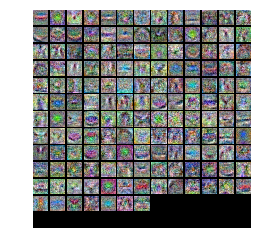

In [35]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

In [36]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)

Test accuracy:  0.521


**Inline Question**

Now that you have trained a Neural Network classifier, you may find that your testing accuracy is much lower than the training accuracy. In what ways can we decrease this gap? Select all that apply.

1. Train on a larger dataset.
2. Add more hidden units.
3. Increase the regularization strength.
4. None of the above.

$\color{blue}{\textit Your Answer:}$

$\color{blue}{\textit Your Explanation:}$

